<a href="https://colab.research.google.com/github/aysutnyva/Machine_Learning/blob/main/Support_vector_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Linear SVM Classification**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame= True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

In [3]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
svm_clf = SVC(kernel= 'linear', C= 1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [5]:
svm_clf.score(X, y)

1.0

In [6]:
#Svm datalarin arasindan mustevi kecirir, classification ucun support vectorlar mumkun qeder uzaq olmali, regression ucun ise daha six.

In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0] / w[1] * x0 - b/w[1]


  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin
  svs = svm_clf.support_vectors_

  plt.plot(x0, decision_boundary, "k", linewidth= 2, zorder = -2)
  plt.plot(x0, gutter_up, "k--", linewidth= 2, zorder = -2)
  plt.plot(x0, gutter_down, "k--", linewidth= 2, zorder = -2)
  plt.scatter(svs[:, 0], svs[:, 1], s= 100, facecolors = '#AAA',
              zorder= -1)

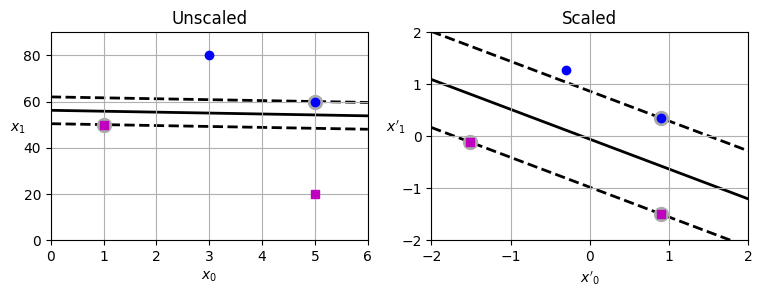

In [8]:
from sklearn.preprocessing import StandardScaler
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel= 'linear', C= 100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel= 'linear', C= 100).fit(X_scaled, ys)

plt.figure(figsize= (9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0] [ys == 1], Xs[:, 1][ys == 1], 'bo')
plt.plot(Xs[:, 0] [ys == 0], Xs[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$', rotation = 0)
plt.title('Unscaled')
plt.axis([0, 6, 0, 90])
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0] [ys == 1], X_scaled[:, 1][ys == 1], 'bo')
plt.plot(X_scaled[:, 0] [ys == 0], X_scaled[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$", rotation = 0)
plt.title('Scaled')
plt.axis([-2, 2, -2, 2])
plt.grid()

plt.show()


### **Linear SVC**

In [9]:
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2) # Iris virginica
svm_clf = make_pipeline(StandardScaler(),
LinearSVC(C=1, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [10]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [11]:
svm_clf.decision_function(X_new) #predict proba


array([ 0.66163816, -0.22035761])

In [12]:
svm_clf.score(X, y)

0.96

The lower we set 'C', the wider the street, so we reduce overfitting

### **Nonlinear SVM Classification**

(-4.5, 4.5, -1.0, 17.0)

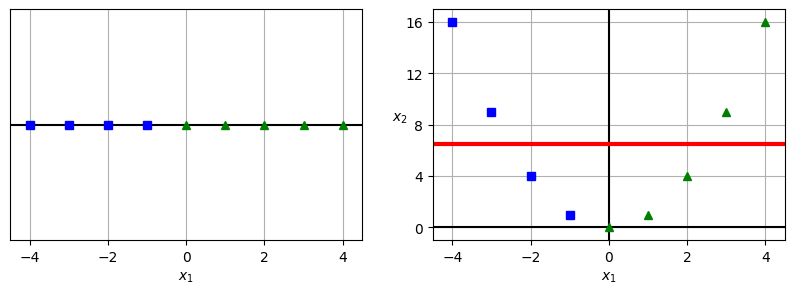

In [13]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]   #c_ ---> concanate
# Create a new y variable with the correct size for X1D
y_new = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

plt.figure(figsize= (10, 3))

plt.subplot(121)
plt.grid(True)
plt.axhline(y= 0, color= 'k')
plt.plot(X1D[:, 0][y_new == 0], np.zeros(4), 'bs')
plt.plot(X1D[:, 0][y_new == 1], np.zeros(5), 'g^')
plt.gca().get_yaxis().set_ticks([])
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True)
plt.axhline(y= 0, color= 'k')
plt.axvline(x= 0, color= 'k')
plt.plot(X2D[:, 0][y_new == 0], X2D[:, 1][y_new == 0], 'bs')
plt.plot(X2D[:, 0][y_new == 1], X2D[:, 1][y_new == 1], 'g^')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation= 0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], 'r-', linewidth= 3)
plt.axis([-4.5, 4.5, -1, 17 ])

In [14]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = make_pipeline(
PolynomialFeatures(degree=3),
StandardScaler(),
LinearSVC(C=10, max_iter=10_000, random_state=42)
)
polynomial_svm_clf.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [15]:
polynomial_svm_clf.score(X, y)


0.99

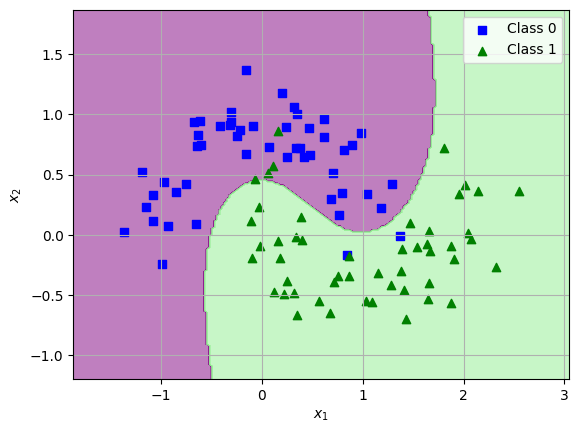

In [16]:
 import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

X, y = make_moons(n_samples=100, noise=0.2, random_state=42)
clf = SVC(kernel="rbf", gamma=1, C=1.0)
clf.fit(X, y)
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                        np.linspace(x2_min, x2_max, 200))

Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.5, cmap=ListedColormap(["purple", "lightgreen"]))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', marker='s', label="Class 0")  # Blue squares
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='green', marker='^', label="Class 1")  # Green triangles
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.grid(True)
plt.show()
